# Self-Organizing Map (SOM)

This notebook demonstrates the use of a Self-Organizing Map (SOM) for unsupervised clustering and visualization of the Wine dataset. The goal is to uncover patterns in the data and see how well the model groups different types of wine based on their chemical properties.

## Importing Libraries

In [1]:
# Data handling 
from sklearn.datasets import load_wine
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and scaling
from sklearn.preprocessing import MinMaxScaler

# SOM implementation
from minisom import MiniSom

## Data Loading and Exploration

In [2]:
# Load wine dataset
wine_data = load_wine()
X = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
y = pd.Series(wine_data.target, name="Target")

# Combine into a single DataFrame for exploration
df = pd.concat([X, y], axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64


In [4]:
# Basic exploration
print(f"Shape of dataset: {df.shape}")
df.describe().T

Shape of dataset: (178, 14)


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


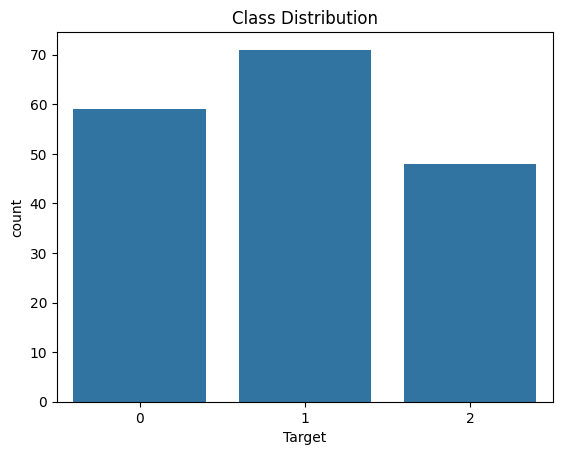

In [5]:
# Check class distribution
sns.countplot(data=df, x='Target')
plt.title('Class Distribution')
plt.show()

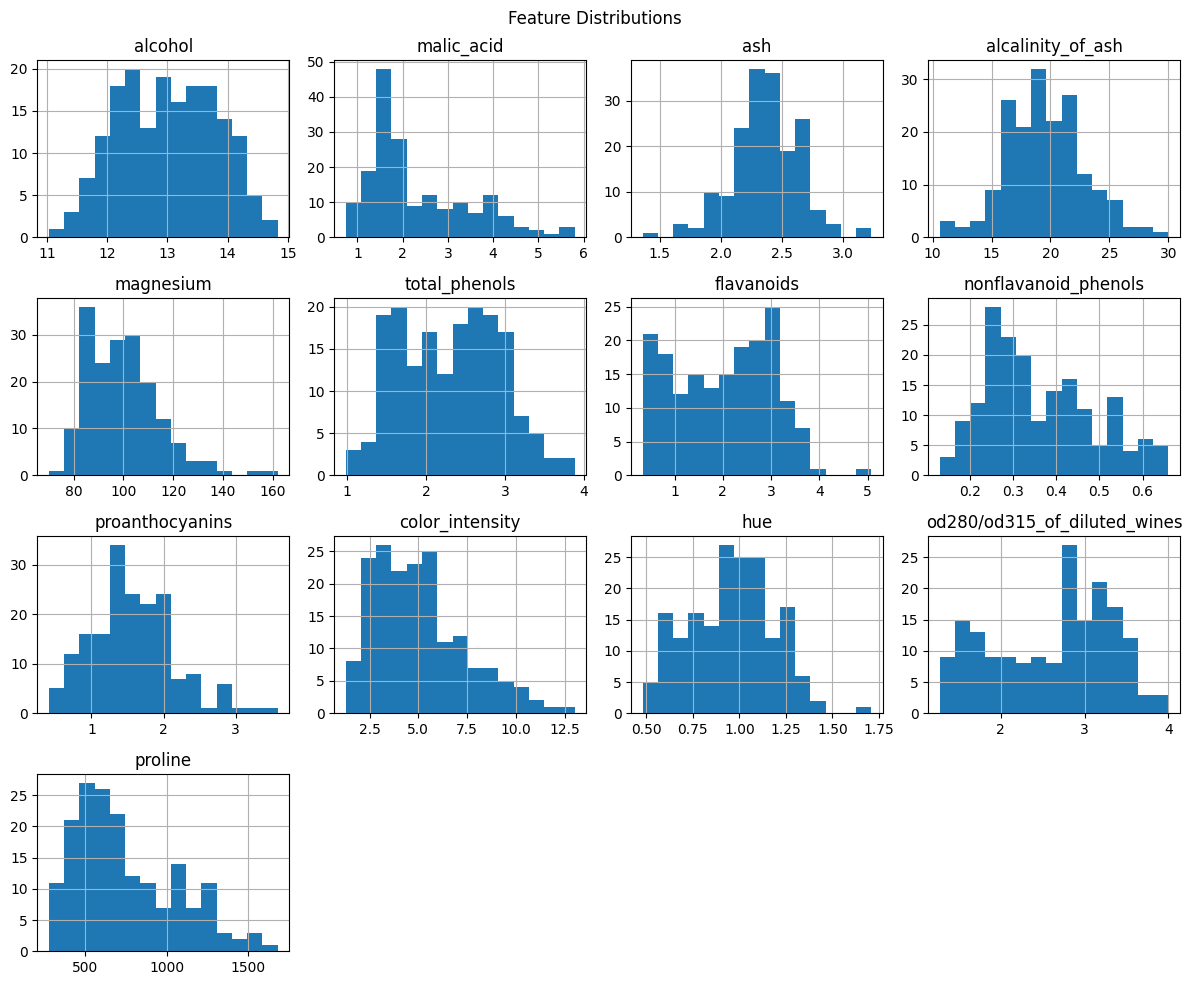

In [6]:
# Plot histograms for all features
df.drop('Target', axis=1).hist(figsize=(12, 10), bins=15)
plt.suptitle('Feature Distributions')
plt.tight_layout()
plt.show()

## SOM Model

In [7]:
# Feature scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.2413915904927246


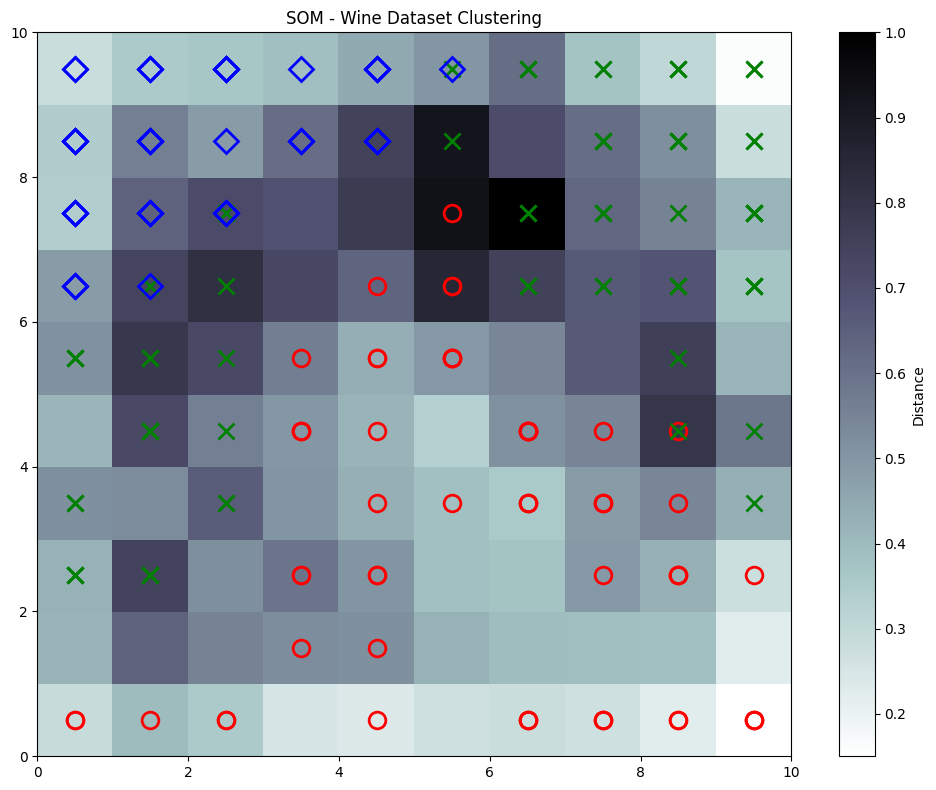

In [8]:
# Initialize SOM 
som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1], sigma=1.0, learning_rate=0.5, random_seed=9)

# Initialize weights and train
som.random_weights_init(X_scaled)
som.train(X_scaled, num_iteration=1000, verbose=True)

# Plotting the U-Matrix (distance map)
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')  # Transposed for correct orientation
plt.colorbar(label='Distance')

# Overlay wine classes
markers = ['o', 'x', 'D']
colors = ['r', 'g', 'b']

for i, x in enumerate(X_scaled):
    w = som.winner(x)
    plt.plot(w[0]+0.5,
             w[1]+0.5,
             markers[y[i]],
             markerfacecolor='None',
             markeredgecolor=colors[y[i]],
             markersize=12,
             markeredgewidth=2)

plt.title("SOM - Wine Dataset Clustering")
plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrated the use of a Self-Organizing Map (SOM) for unsupervised clustering and visualization of the Wine dataset. The SOM was able to uncover patterns in the data without any labels and revealed meaningful class groupings through its U-Matrix visualization.

Key takeaways from the U-Matrix and SOM output:
- **Lighter regions** in the background indicate similar neurons, suggesting well-formed clusters.
- **Darker regions** represent higher distances between neurons, highlighting cluster boundaries.
- **Red circles** represent **Class 0** wines, which form a distinct and compact cluster.
- **Green X's** represent **Class 1** wines, mostly concentrated in a separate region.
- **Blue diamonds** represent **Class 2** wines, also forming a well-defined group.

The SOM successfully grouped similar wine types based on their chemical properties, with clear separation between most classes. While a few overlaps occurred, the overall structure indicates that SOM is effective at identifying natural groupings in complex, high-dimensional data.

This confirms the value of SOMs as a powerful tool for visualizing and exploring datasets where class labels may not be available or where understanding the structure is critical.